# Analysing data trends to yeild some business insights from data

In [1]:
import pandas as pd
import numpy as np
import re, requests
import time
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import seaborn as sns
import plotly.express as px
from pandas.api.types import CategoricalDtype
from math import log


In [2]:
!ls  wrangled_log/only_host_large/

_SUCCESS
part-00000-e3a8b0af-89cb-4326-bf86-018fe738bd2a-c000.csv


In [3]:
data_file = 'wrangled_log/only_host_large/part-00000-e3a8b0af-89cb-4326-bf86-018fe738bd2a-c000.csv'
df = pd.read_csv(data_file,delimiter='\t'
                 ,header=0
                 ,dtype='str'
                )

In [4]:
df=df.drop(0)

In [5]:
# Lambda function to apply
def to_utc(df):
    format='%d/%b/%Y:%H:%M:%S %z'
    given_date = df['Timestamp']
    return datetime.datetime.strptime(given_date, format).astimezone(pytz.utc)

def to_date(df):
    format='%d/%b/%Y:%H:%M:%S %z'
    given_date = df['Timestamp']
    return datetime.datetime.strptime(given_date, format).date()
    
def to_time(df):
    format='%d/%b/%Y:%H:%M:%S %z'
    given_date = df['Timestamp']
    return datetime.datetime.strptime(given_date, format).time()

def to_year_month(df):
    format='%Y-%m'
    given_date = df['Timestamp']
    return datetime.datetime.strptime(given_date, format).time()

def to_utc_date(df):
    format='%Y-%m-%d %H:%M:%S%z'
    given_date = df['UTC_Timestamp']
    return datetime.datetime.strptime(str(given_date), format).date()
    
def to_utc_time(df):
    format='%Y-%m-%d %H:%M:%S%z'
    given_date = df['UTC_Timestamp']
    return datetime.datetime.strptime(str(given_date), format).time()

In [6]:
df['UTC_Timestamp'] = df.apply(to_utc,axis=1)

df['Date'] = df.apply(to_date,axis=1)

df['Time'] = df.apply(to_time,axis=1)

df['Year_Month'] = df.apply(to_utc_time,axis=1)

df['UTC_Date'] = df.apply(to_utc_date,axis=1)

df['UTC_Time'] = df.apply(to_utc_time,axis=1)

In [7]:
country_info_file='countryLargeFineGran.csv'
countries=pd.read_csv(country_info_file)
countries.head(5)

Unnamed: 0            Host        Country CountryCode          City  \
0           0     13.66.139.0  United States          US        Quincy   
1           1  157.48.153.185          India          IN     Hyderabad   
2           2  216.244.66.230  United States          US       Tukwila   
3           3    54.36.148.92         France          FR       Roubaix   
4           4   92.101.35.224         Russia          RU  Severodvinsk   

              Timezone      Lat        Lon              Reg  
0  America/Los_Angeles  47.2330 -119.85200       Washington  
1         Asia/Kolkata  17.4110   78.44870        Telangana  
2  America/Los_Angeles  47.4931 -122.29400       Washington  
3         Europe/Paris  50.6916    3.20151  Hauts-de-France  
4        Europe/Moscow  64.5676   39.80180   Arkhangelskaya

In [8]:
df_countries=pd.merge(df,countries, on='Host')
df_countries=df_countries.drop(columns=['Unnamed: 0'])
df_countries.head(5)

Timestamp         Host             UTC_Timestamp  \
0  19/Dec/2020:13:57:26 +0100  13.66.139.0 2020-12-19 12:57:26+00:00   
1  22/Jan/2021:01:57:53 +0100  13.66.139.0 2021-01-22 00:57:53+00:00   
2  07/Feb/2021:18:59:27 +0100  13.66.139.0 2021-02-07 17:59:27+00:00   
3  11/Mar/2021:07:37:22 +0100  13.66.139.0 2021-03-11 06:37:22+00:00   
4  30/Mar/2021:20:18:03 +0200  13.66.139.0 2021-03-30 18:18:03+00:00   

         Date      Time Year_Month    UTC_Date  UTC_Time        Country  \
0  2020-12-19  13:57:26   12:57:26  2020-12-19  12:57:26  United States   
1  2021-01-22  01:57:53   00:57:53  2021-01-22  00:57:53  United States   
2  2021-02-07  18:59:27   17:59:27  2021-02-07  17:59:27  United States   
3  2021-03-11  07:37:22   06:37:22  2021-03-11  06:37:22  United States   
4  2021-03-30  20:18:03   18:18:03  2021-03-30  18:18:03  United States   

  CountryCode    City             Timezone     Lat      Lon         Reg  
0          US  Quincy  America/Los_Angeles  47.233 -119.852  Washington  
1          US  Quincy  America/Los_Angeles  47.233 -119.852  Washington  
2          US  Quincy  America/Los_Angeles  47.233 -119.852  Washington  
3          US  Quincy  America/Los_Angeles  47.233 -119.852  Washington  
4          US  Quincy  America/Los_Angeles  47.233 -119.852  Washington

In [9]:
bydate=df_countries.groupby(['Date']).count()

In [10]:
bydate.head(5)

Timestamp  Host  UTC_Timestamp  Time  Year_Month  UTC_Date  \
Date                                                                     
2020-12-19       1135  1135           1135  1135        1135      1135   
2020-12-20       3698  3698           3698  3698        3698      3698   
2020-12-21       3982  3982           3982  3982        3982      3982   
2020-12-22       3645  3645           3645  3645        3645      3645   
2020-12-23       3856  3856           3856  3856        3856      3856   

            UTC_Time  Country  CountryCode  City  Timezone   Lat   Lon   Reg  
Date                                                                          
2020-12-19      1135     1135         1135  1135      1135  1135  1135  1135  
2020-12-20      3698     3698         3698  3698      3698  3698  3698  3698  
2020-12-21      3982     3982         3982  3982      3982  3982  3982  3982  
2020-12-22      3645     3645         3645  3645      3645  3645  3645  3645  
2020-12-23      3856     3856         3856  3856      3856  3856  3856  3856

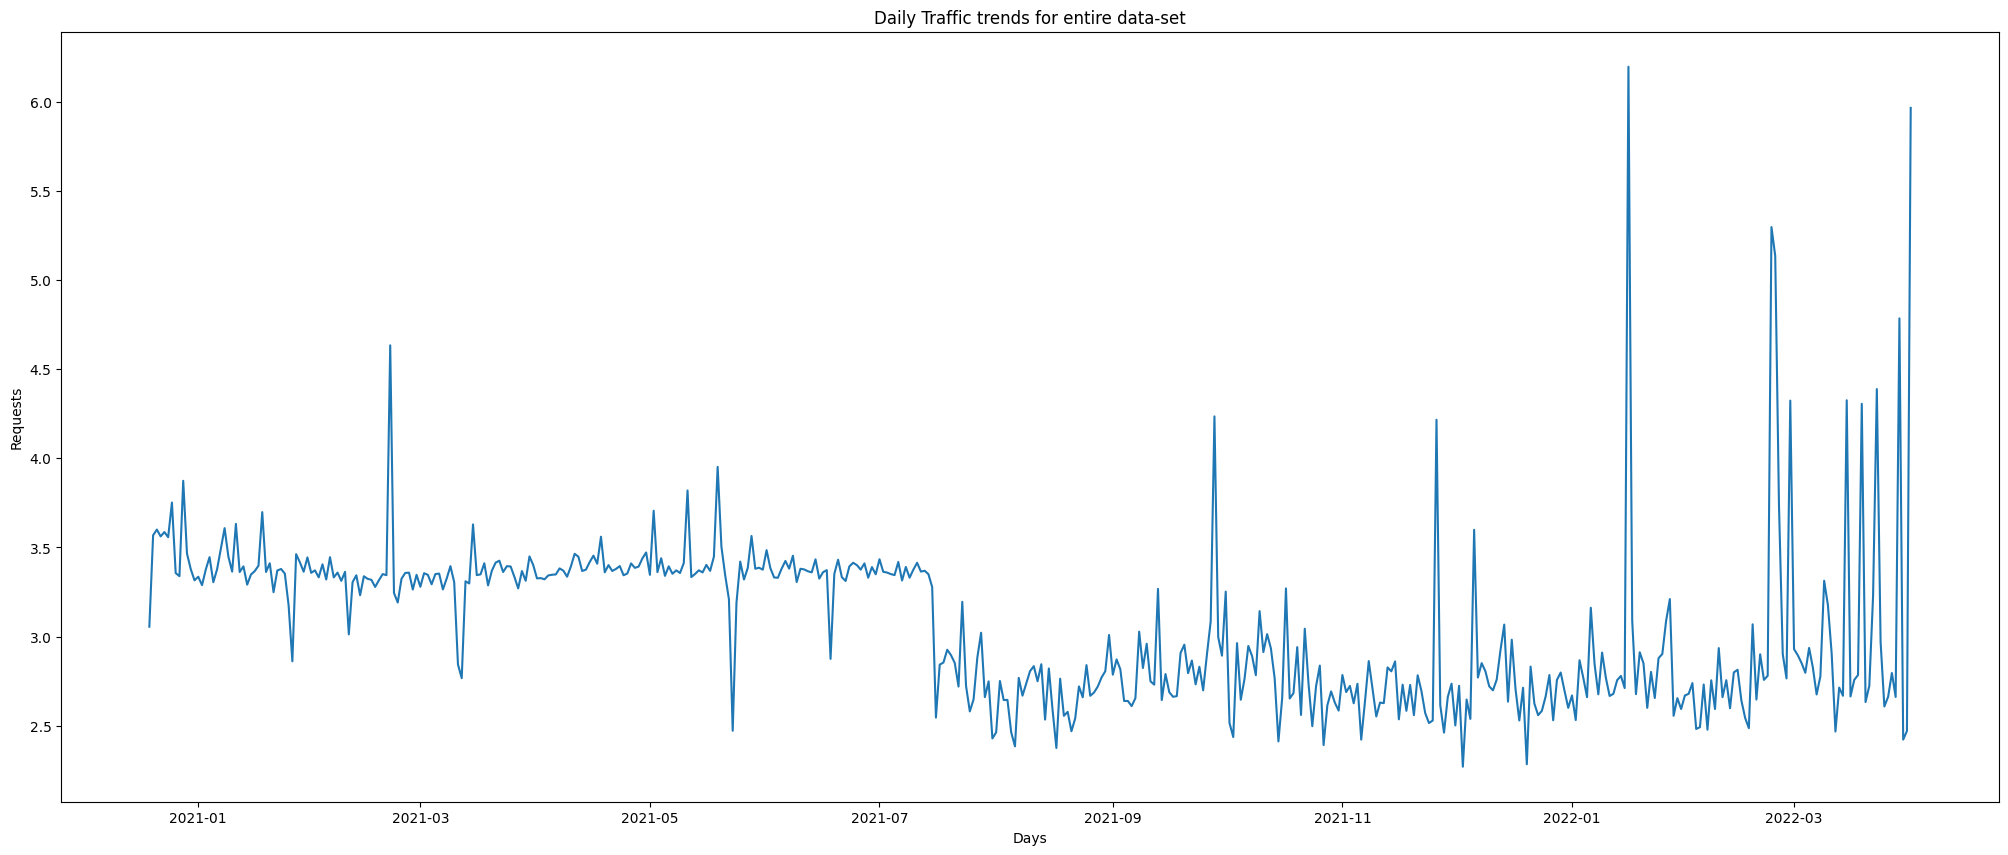

In [11]:
fig, ax = plt.subplots(figsize=(25,10))
plt.title('Daily Traffic trends for entire data-set')
sns.lineplot(ax=ax,data=bydate, x='Date',y=np.log10(bydate['Host']))
ax.set(xlabel='Days', ylabel='Requests')
plt.show()

### We observe requests reducing dratically mid 2021 during the pandemic and spikes back in 2022 when travel started opening up again

### Further checking Weekly trend

In [12]:
df_countries['Week']=df_countries['Date'].apply(lambda x: (x.strftime('%V')))
df_countries['Day']=df_countries['Date'].apply(lambda x: (x.strftime('%A')))
df_countries['Year']=df_countries['Date'].apply(lambda x: (x.strftime("%Y")))
df_countries['Month']=df_countries['Date'].apply(lambda x: (x.strftime("%b")))
df_countries['Month-Year']=df_countries['Date'].apply(lambda x: (x.strftime("%b-%Y")))
df_countries['Hour']=df_countries['Time'].apply(lambda x: (x.hour))

In [13]:
df_countries.head(5)

Timestamp         Host             UTC_Timestamp  \
0  19/Dec/2020:13:57:26 +0100  13.66.139.0 2020-12-19 12:57:26+00:00   
1  22/Jan/2021:01:57:53 +0100  13.66.139.0 2021-01-22 00:57:53+00:00   
2  07/Feb/2021:18:59:27 +0100  13.66.139.0 2021-02-07 17:59:27+00:00   
3  11/Mar/2021:07:37:22 +0100  13.66.139.0 2021-03-11 06:37:22+00:00   
4  30/Mar/2021:20:18:03 +0200  13.66.139.0 2021-03-30 18:18:03+00:00   

         Date      Time Year_Month    UTC_Date  UTC_Time        Country  \
0  2020-12-19  13:57:26   12:57:26  2020-12-19  12:57:26  United States   
1  2021-01-22  01:57:53   00:57:53  2021-01-22  00:57:53  United States   
2  2021-02-07  18:59:27   17:59:27  2021-02-07  17:59:27  United States   
3  2021-03-11  07:37:22   06:37:22  2021-03-11  06:37:22  United States   
4  2021-03-30  20:18:03   18:18:03  2021-03-30  18:18:03  United States   

  CountryCode  ...             Timezone     Lat      Lon         Reg Week  \
0          US  ...  America/Los_Angeles  47.233 -119.852  Washington   51   
1          US  ...  America/Los_Angeles  47.233 -119.852  Washington   03   
2          US  ...  America/Los_Angeles  47.233 -119.852  Washington   05   
3          US  ...  America/Los_Angeles  47.233 -119.852  Washington   10   
4          US  ...  America/Los_Angeles  47.233 -119.852  Washington   13   

        Day  Year Month Month-Year Hour  
0  Saturday  2020   Dec   Dec-2020   13  
1    Friday  2021   Jan   Jan-2021    1  
2    Sunday  2021   Feb   Feb-2021   18  
3  Thursday  2021   Mar   Mar-2021    7  
4   Tuesday  2021   Mar   Mar-2021   20  

[5 rows x 21 columns]

In [14]:
weekly=df_countries.groupby(['Week','Day']).size().reset_index(name="Count")
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
weekly['Day'] = weekly['Day'].astype(cat_type)

In [15]:
weekly.head(5)

Week       Day  Count
0   01    Friday   4756
1   01    Monday   3524
2   01  Saturday   3279
3   01    Sunday   3126
4   01  Thursday   4548

[]

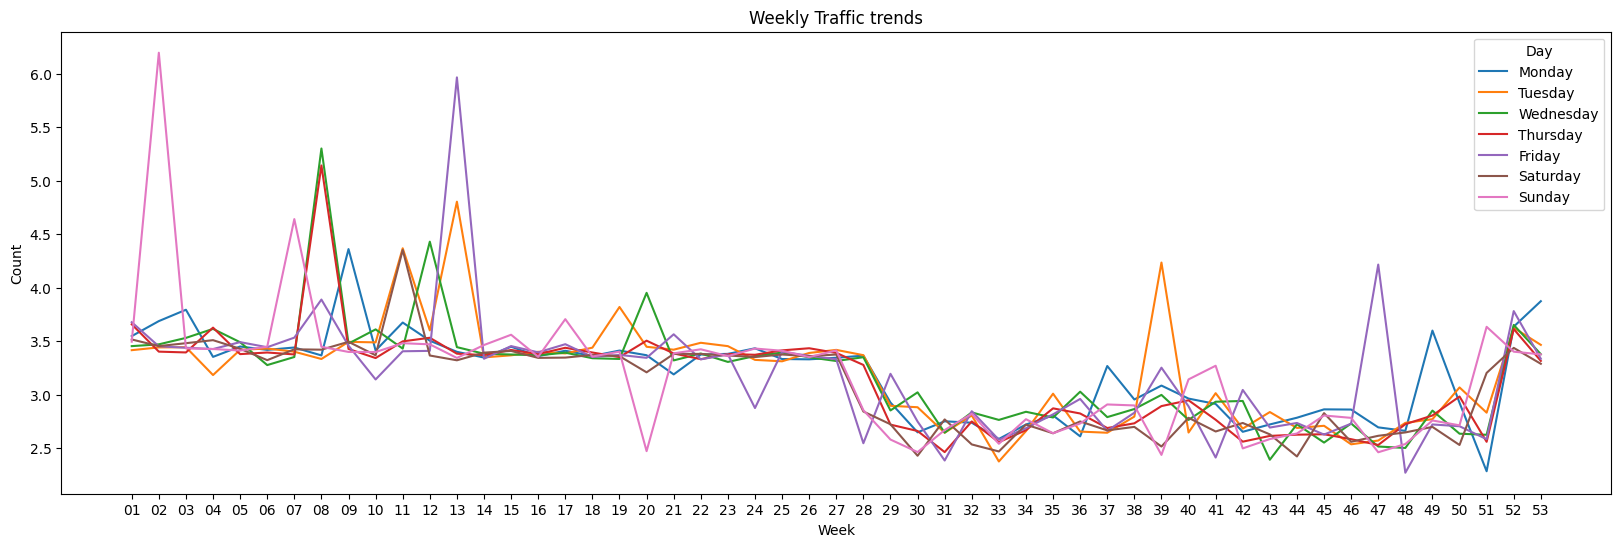

In [16]:
fig, ax = plt.subplots(figsize=(20,6))
sns.color_palette("colorblind")
plt.title('Weekly Traffic trends')
ax=sns.lineplot(data=weekly, x='Week',y=np.log10(weekly['Count']),hue='Day',orient='x')
ax.plot()

[]

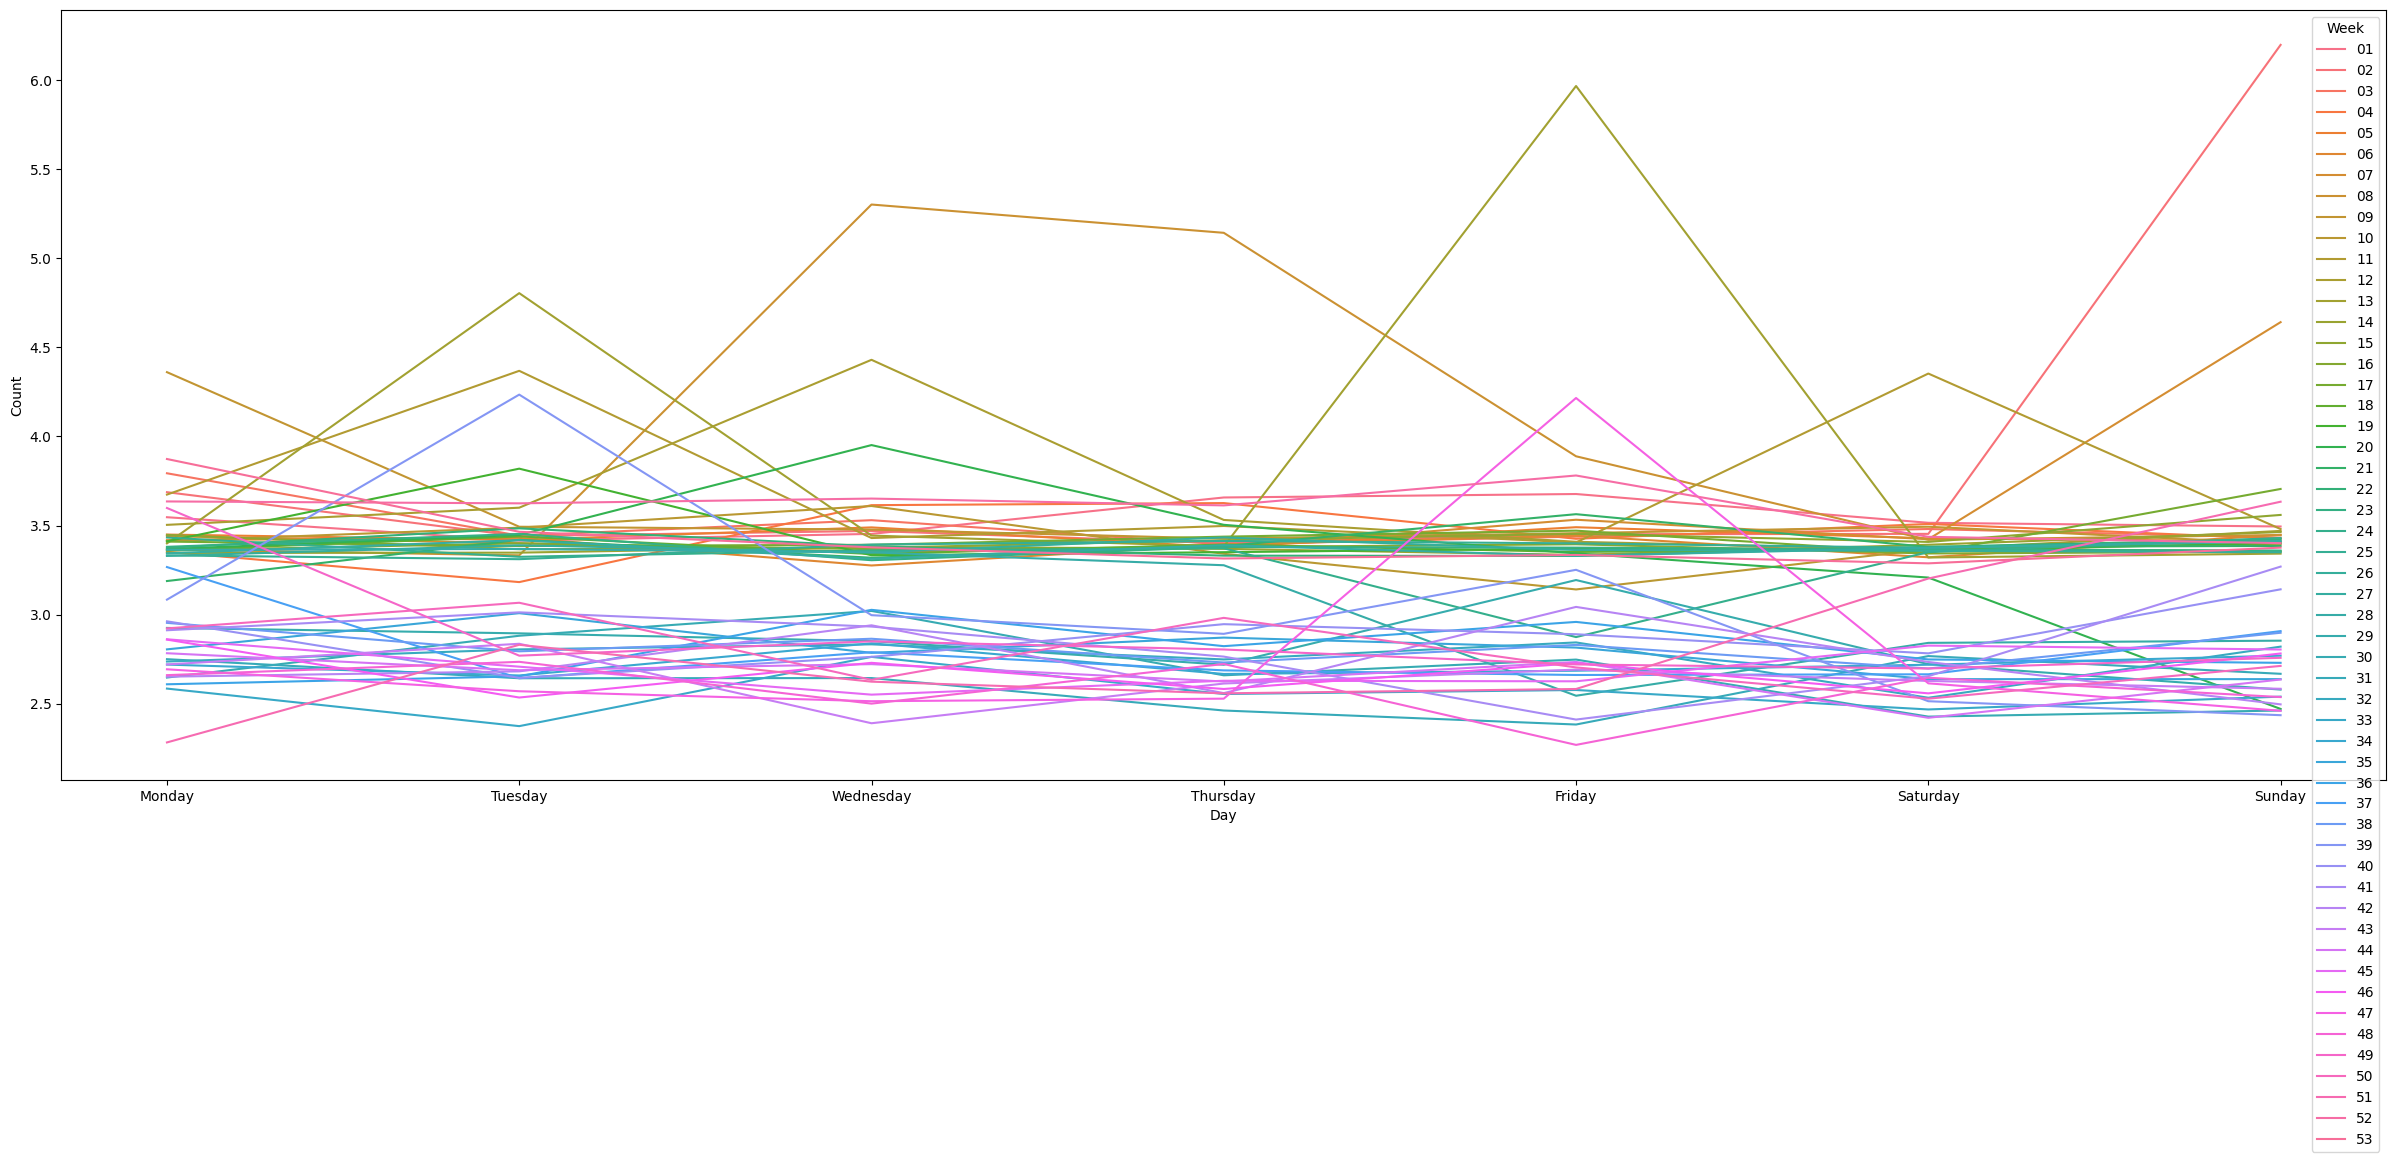

In [17]:
fig, ax = plt.subplots(figsize=(30,10))
sns.color_palette("colorblind")
ax=sns.lineplot(data=weekly, x='Day',y=np.log10(weekly['Count']),hue='Week',orient='x')
ax.plot()


### Further checking Monthly trend

In [18]:
monthly=df_countries.groupby(['Month','Year']).size().reset_index(name="Count")
cats = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
monthly['Month'] = monthly['Month'].astype(cat_type)

In [19]:
monthly.head(5)

Month  Year   Count
0   Apr  2021   74102
1   Apr  2022  924347
2   Aug  2021   15423
3   Dec  2020   44868
4   Dec  2021   19619

[]

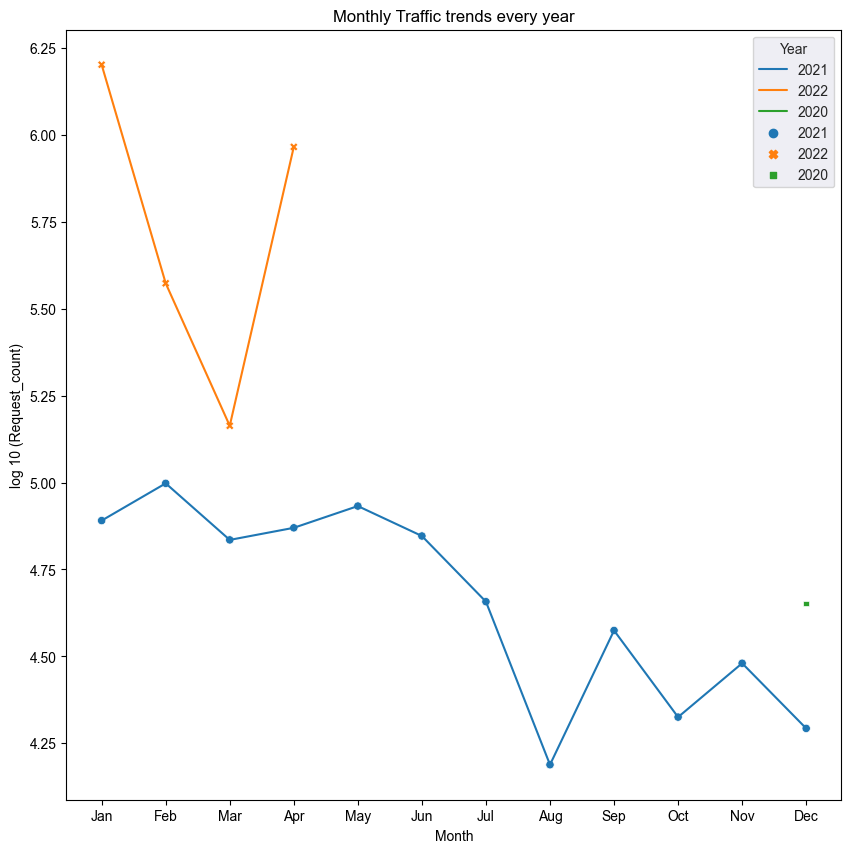

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Monthly Traffic trends every year')
plt.ylabel('log 10 (Request_count)')
sns.set_style('darkgrid')
sns.color_palette("mako", as_cmap=True)
ax=sns.lineplot(data=monthly, x='Month',y=np.log10(monthly['Count']),hue='Year',orient='x')
ax=sns.scatterplot(data=monthly,x='Month',y=np.log10(monthly['Count']),hue='Year',style='Year')
ax.plot()

In [21]:
monthly_2021=df_countries[(df_countries['Year'] == "2021" )]
weekly_2021=monthly_2021.groupby(['Week']).size().reset_index(name="Count")
cat_type = CategoricalDtype(categories=cats, ordered=True)

In [22]:
weekly_2021.head(5)

Week  Count
0   01  19461
1   02  18065
2   03  18632
3   04  15096
4   05  16345

[]

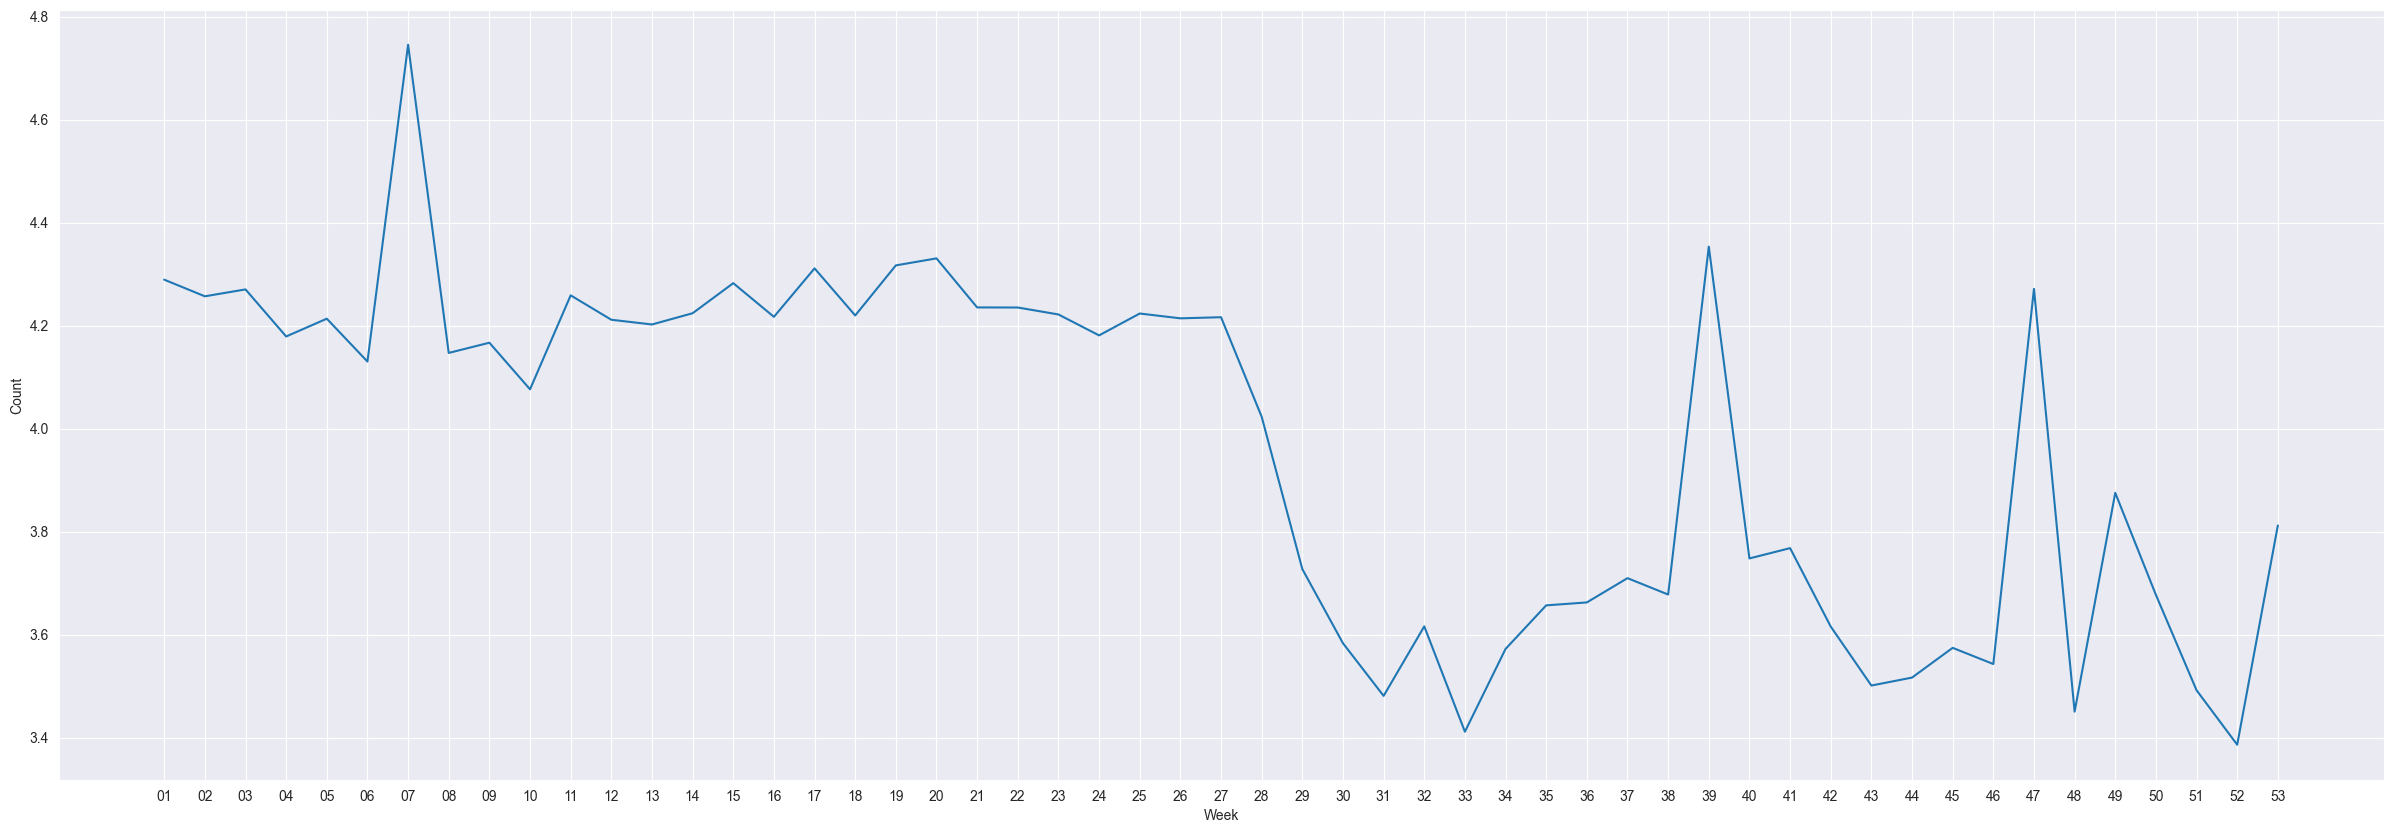

In [23]:
fig, ax = plt.subplots(figsize=(30,10))
sns.color_palette("colorblind")
ax=sns.lineplot(data=weekly_2021, x='Week',y=np.log10(weekly_2021['Count']),orient='x')
ax.plot()

### Trends on weekends

In [24]:
weekend_days=['Saturday','Sunday']
weekend_record=df_countries.loc[df_countries['Day'].isin(weekend_days)]

In [25]:
weekend_record.head(5)

Timestamp            Host             UTC_Timestamp  \
0   19/Dec/2020:13:57:26 +0100     13.66.139.0 2020-12-19 12:57:26+00:00   
2   07/Feb/2021:18:59:27 +0100     13.66.139.0 2021-02-07 17:59:27+00:00   
7   05/Jun/2021:09:37:40 +0200     13.66.139.0 2021-06-05 07:37:40+00:00   
14  19/Dec/2020:14:08:06 +0100  157.48.153.185 2020-12-19 13:08:06+00:00   
15  19/Dec/2020:14:08:08 +0100  157.48.153.185 2020-12-19 13:08:08+00:00   

          Date      Time Year_Month    UTC_Date  UTC_Time        Country  \
0   2020-12-19  13:57:26   12:57:26  2020-12-19  12:57:26  United States   
2   2021-02-07  18:59:27   17:59:27  2021-02-07  17:59:27  United States   
7   2021-06-05  09:37:40   07:37:40  2021-06-05  07:37:40  United States   
14  2020-12-19  14:08:06   13:08:06  2020-12-19  13:08:06          India   
15  2020-12-19  14:08:08   13:08:08  2020-12-19  13:08:08          India   

   CountryCode  ...             Timezone     Lat       Lon         Reg Week  \
0           US  ...  America/Los_Angeles  47.233 -119.8520  Washington   51   
2           US  ...  America/Los_Angeles  47.233 -119.8520  Washington   05   
7           US  ...  America/Los_Angeles  47.233 -119.8520  Washington   22   
14          IN  ...         Asia/Kolkata  17.411   78.4487   Telangana   51   
15          IN  ...         Asia/Kolkata  17.411   78.4487   Telangana   51   

         Day  Year Month Month-Year Hour  
0   Saturday  2020   Dec   Dec-2020   13  
2     Sunday  2021   Feb   Feb-2021   18  
7   Saturday  2021   Jun   Jun-2021    9  
14  Saturday  2020   Dec   Dec-2020   14  
15  Saturday  2020   Dec   Dec-2020   14  

[5 rows x 21 columns]

In [26]:
weekend_record_by_month_year=weekend_record.groupby(['Month-Year','Month','Year','Day']).size().reset_index(name="Count")

In [27]:
weekend_record_by_month_year.head(5)

Month-Year Month  Year       Day  Count
0   Apr-2021   Apr  2021  Saturday   9331
1   Apr-2021   Apr  2021    Sunday  10999
2   Aug-2021   Aug  2021  Saturday   1746
3   Aug-2021   Aug  2021    Sunday   2354
4   Dec-2020   Dec  2020  Saturday   3404

In [28]:
##Avg Rest of the week
weekend_day=['Saturday','Sunday']
week_record=df_countries.loc[~df_countries['Day'].isin(weekend_days)]
week_record.head(5)

week_record_by_month_year=week_record.groupby(['Month','Year','Day']).size().reset_index(name="Count")
week_record_by_month_year=week_record_by_month_year.groupby (['Month','Year']).mean()
week_record_by_month_year

/var/folders/34/g1b6cj7x3yv89_57lsmrx0_w0000gn/T/ipykernel_84028/1810282532.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_record_by_month_year=week_record_by_month_year.groupby (['Month','Year']).mean()


Count
Month Year          
Apr   2021   10754.4
      2022  924347.0
Aug   2021    2264.6
Dec   2020    7117.0
      2021    3167.2
Feb   2021    8379.2
      2022   74001.2
Jan   2021   10754.4
      2022    3095.2
Jul   2021    6669.2
Jun   2021   10126.4
Mar   2021   10231.2
      2022   24321.8
May   2021   12422.4
Nov   2021    5306.8
Oct   2021    2913.6
Sep   2021    6600.8

[]

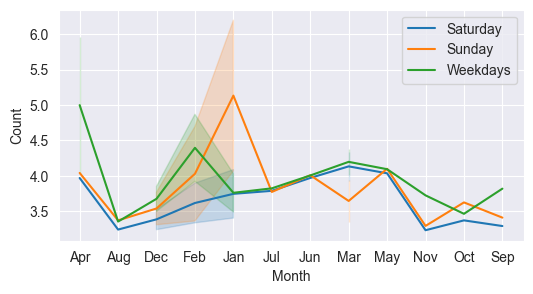

In [29]:
plt.subplots(figsize=(6,3))
sns.lineplot(data=weekend_record_by_month_year, x='Month',y=np.log10(weekend_record_by_month_year['Count']),hue='Day')
sns.lineplot(data=week_record_by_month_year, x='Month',y=np.log10(week_record_by_month_year['Count']),label='Weekdays')
plt.plot()

### Trends of the Busiest days

In [30]:
unique_days=df_countries.groupby('Date').count().reset_index(names='Date')
unique_days=unique_days.sort_values('Host', ascending=False)
unique_days=unique_days.head(50)
busiest_days=unique_days['Date'].head(50)
unique_days.head(5)

Date  Timestamp     Host  UTC_Timestamp     Time  Year_Month  \
393  2022-01-16    1573219  1573219        1573219  1573219     1573219   
468  2022-04-01     924347   924347         924347   924347      924347   
431  2022-02-23     198199   198199         198199   198199      198199   
432  2022-02-24     136706   136706         136706   136706      136706   
465  2022-03-29      60929    60929          60929    60929       60929   

     UTC_Date  UTC_Time  Country  CountryCode  ...  Timezone      Lat  \
393   1573219   1573219  1573219      1573219  ...   1573219  1573219   
468    924347    924347   924347       924347  ...    924347   924347   
431    198199    198199   198199       198199  ...    198199   198199   
432    136706    136706   136706       136706  ...    136706   136706   
465     60929     60929    60929        60929  ...     60929    60929   

         Lon      Reg     Week      Day     Year    Month  Month-Year     Hour  
393  1573219  1573219  1573219  1573219  1573219  1573219     1573219  1573219  
468   924347   924347   924347   924347   924347   924347      924347   924347  
431   198199   198199   198199   198199   198199   198199      198199   198199  
432   136706   136706   136706   136706   136706   136706      136706   136706  
465    60929    60929    60929    60929    60929    60929       60929    60929  

[5 rows x 21 columns]

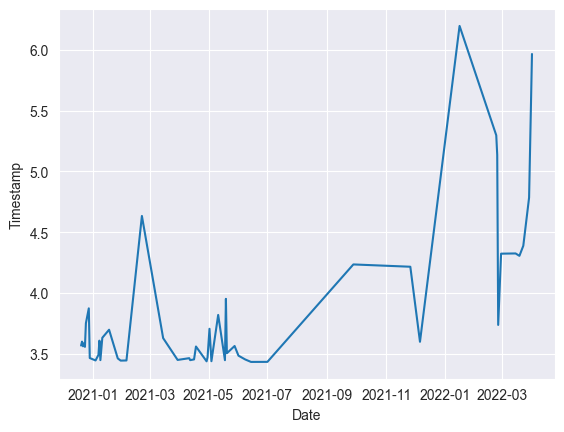

In [31]:
sns.lineplot(data=unique_days, x='Date',y=np.log10(unique_days['Timestamp']))
plt.show()

### Load on the website shoots up in between Dec-Mar and rest of the year has relatively low traffic. 
Business insight - Scale up infrastructure to cope with the load Dec - Mar every year

### Average Request count every hour throughout the data set 

In [32]:
avg_requests_hourly_every_date=df_countries.groupby('Hour').count()/len(df_countries['Date'].unique().tolist())
avg_requests_hourly_every_date=avg_requests_hourly_every_date.reset_index(names='Hour')

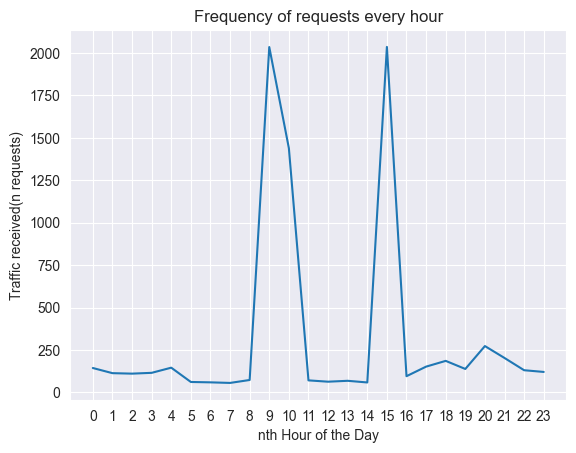

In [33]:
x=sns.lineplot(data=avg_requests_hourly_every_date, x='Hour',y='Host')
x.set_xticks(range(0,24))
x.set(xlabel='nth Hour of the Day', ylabel='Traffic received(n requests)', title='Frequency of requests every hour')
plt.show()

# Analytics based on Geographic location

In [34]:
#Graph of requests count on each time stamp
requests_by_location_temp=df_countries.groupby(['Country']).count().reset_index(names='Country')
requests_by_location= requests_by_location_temp[['Country', 'Host']].copy()
requests_by_location=requests_by_location.sort_values('Host')

In [35]:
fig= px.choropleth(requests_by_location, locations='Country'
                   ,color="Host"
                   ,hover_name="Country"
                   ,locationmode='country names'
                   ,animation_group="Country"
                   ,color_continuous_scale=px.colors.sequential.Darkmint
                   ,title='Requests to application spread geologically')
fig.show()

### Shows major Customer Base is from United States, Russia, South Africa where as least clients from Mali, Zambia, Iceland etc 

In [49]:
#Graph of requests count on each time stamp
requests_by_location_temp=df_countries[['Country','Host','Date']].copy()
requests_by_location_temp=requests_by_location_temp.groupby(['Country','Date']).count().reset_index(names=['Country','Date'])
requests_by_location_date=requests_by_location_temp.sort_values('Host', ascending=False)
requests_by_location_date.head(5)

Country        Date     Host
11706  United States  2022-01-16  1572852
11781  United States  2022-04-01   924127
824          Belarus  2022-02-23   197881
825          Belarus  2022-02-24   135957
11778  United States  2022-03-29    59388

In [50]:
fig= px.choropleth(requests_by_location_date, locations='Country'
                   ,color="Host"
                   ,hover_name="Date"
                   ,locationmode='country names'
                   ,animation_group="Country"
                   ,animation_frame='Date'                   
                   ,color_continuous_scale="Viridis"
                   ,title='Requests to application spread geologically'
                   ,height=720
                   ,width=1080
                  )
fig.show()